# VGG16

## Loading Libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.applications import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Loading the dataset Images

In [5]:

TRAIN_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/train"
VAL_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/test"


TRAIN_COVID_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/train/COVID19"
TRAIN_NORMAL_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL"
TRAIN_PNE_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA"


VAL_NORMAL_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL"
VAL_PNEU_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"
VAL_COVID_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/test/COVID19"

## Image Augmentation

In [6]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
)

In [7]:
train_generator = generator.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')

Found 5144 images belonging to 3 classes.


In [8]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [9]:
validation_generator = generator.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')

Found 1288 images belonging to 3 classes.


## Applying VGG16 Model

In [12]:
epochs = 100
stepsperepoch=9
validationsteps=1
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=100)
mc = ModelCheckpoint("own.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)



In [13]:
model = VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:


hist = model.fit_generator(
    train_generator,
    epochs=epochs,
    callbacks=[annealer,mc,es],
    steps_per_epoch=stepsperepoch,
    validation_data=validation_generator,
    validation_steps = validationsteps
)



Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 1.6903 - accuracy: 0.3438
Epoch 00001: val_loss improved from inf to 1.02385, saving model to own.h5
9/9 [==============================] - 19s 2s/step - loss: 1.6903 - accuracy: 0.3438 - val_loss: 1.0239 - val_accuracy: 0.3438
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 0.9276 - accuracy: 0.5347
Epoch 00002: val_loss improved from 1.02385 to 0.78001, saving model to own.h5
9/9 [==============================] - 19s 2s/step - loss: 0.9276 - accuracy: 0.5347 - val_loss: 0.7800 - val_accuracy: 0.7812
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 0.8945 - accuracy: 0.6458
Epoch 00003: val_loss did not improve from 0.78001
9/9 [==============================] - 14s 2s/step - loss: 0.8945 - accuracy: 0.6458 - val_loss: 0.7824 - val_accuracy: 0.6875
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 0.7744 - accuracy: 0.7257
Epoch 00004: val_loss did not improve from

Epoch 31/100
9/9 [==============================] - ETA: 0s - loss: 0.8526 - accuracy: 0.6458
Epoch 00031: val_loss did not improve from 0.63517
9/9 [==============================] - 11s 1s/step - loss: 0.8526 - accuracy: 0.6458 - val_loss: 0.7307 - val_accuracy: 0.7500
Epoch 32/100
9/9 [==============================] - ETA: 0s - loss: 0.8589 - accuracy: 0.6389
Epoch 00032: val_loss did not improve from 0.63517
9/9 [==============================] - 13s 1s/step - loss: 0.8589 - accuracy: 0.6389 - val_loss: 0.8737 - val_accuracy: 0.6250
Epoch 33/100
9/9 [==============================] - ETA: 0s - loss: 0.8193 - accuracy: 0.6701
Epoch 00033: val_loss did not improve from 0.63517
9/9 [==============================] - 11s 1s/step - loss: 0.8193 - accuracy: 0.6701 - val_loss: 0.7864 - val_accuracy: 0.7188
Epoch 34/100
9/9 [==============================] - ETA: 0s - loss: 0.8136 - accuracy: 0.6701
Epoch 00034: val_loss did not improve from 0.63517
9/9 [==============================] - 

9/9 [==============================] - ETA: 0s - loss: 0.8689 - accuracy: 0.6354
Epoch 00061: val_loss did not improve from 0.62012
9/9 [==============================] - 12s 1s/step - loss: 0.8689 - accuracy: 0.6354 - val_loss: 0.7525 - val_accuracy: 0.6875
Epoch 62/100
9/9 [==============================] - ETA: 0s - loss: 0.8723 - accuracy: 0.6458
Epoch 00062: val_loss did not improve from 0.62012
9/9 [==============================] - 11s 1s/step - loss: 0.8723 - accuracy: 0.6458 - val_loss: 0.7568 - val_accuracy: 0.7500
Epoch 63/100
9/9 [==============================] - ETA: 0s - loss: 0.8356 - accuracy: 0.6701
Epoch 00063: val_loss did not improve from 0.62012
9/9 [==============================] - 10s 1s/step - loss: 0.8356 - accuracy: 0.6701 - val_loss: 0.7562 - val_accuracy: 0.7188
Epoch 64/100
9/9 [==============================] - ETA: 0s - loss: 0.8056 - accuracy: 0.6910
Epoch 00064: val_loss did not improve from 0.62012
9/9 [==============================] - 11s 1s/step -

In [16]:
preds = model.evaluate(validation_generator)
print ("Validation Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

41/41 [==============================] - 38s 928ms/step - loss: 0.8338 - accuracy: 0.6638
Validation Loss = 0.8338462114334106
Validation Accuracy = 0.6638198494911194


## Accuracy:66%

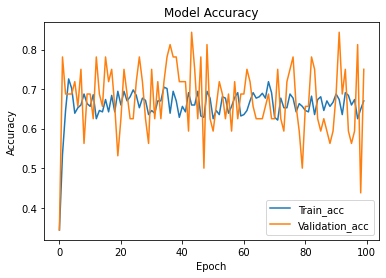

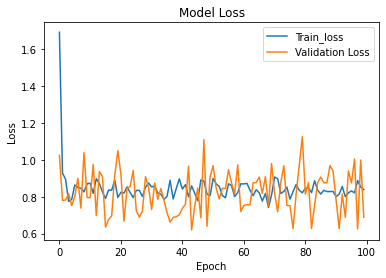

In [17]:


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

